In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 3]
from pynamix import io, data, measure, color, plotting, exposure
%matplotlib inline

# Load example data

In [6]:
ims, logfile = data.pendulum() # load built in test data
print(ims.shape)
# im, logfile = io.load_seq('/Users/benjymarks/Dropbox/Research/Experiments/DynamiX/Marta/MartaTest1-D1.seq') # load your own data
# save_as_tiffs('tt',ims,tmin=1000,tmax=1050,tstep=10) # save some of the SEQ file as tiffs in a folder `tt`

(7373824,)


# Find min and max threshold values

interactive(children=(IntSlider(value=0, description='frame', max=7373823), IntSlider(value=0, description='vm…

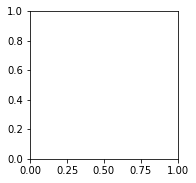

In [3]:
# data = np.random.rand(10,500,800)**2*65535
# data.astype(int)
w = plotting.hist_GUI(ims)
display(w)

# Apply threshold

In [23]:
masked_data = exposure.clamp(data,w.kwargs['vmin'],w.kwargs['vmax'])

# Calculate size and orientation fields

In [25]:
virino = color.virino()
orient, dzeta = measure.orientation_map(masked_data,tmin=1000,tmax=1002)
size = measure.size_map(masked_data,tmin=1000,tmax=1002)

plt.subplot(131)
plt.imshow(masked_data[1000])
plt.subplot(132)
plt.pcolormesh(orient[:,:,0],cmap=virino)
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(size[:,:,0])
plt.colorbar()
plt.show()

IndexError: index 1000 is out of bounds for axis 0 with size 10

# Load some PIVLab data

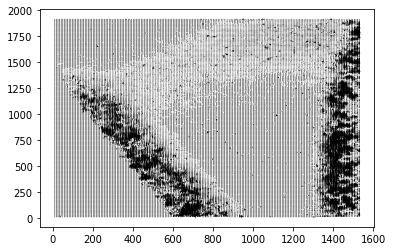

In [2]:
x,y,u,v = io.load_PIVLab_txtfiles('/Volumes/LTS/DynamiX/PerpetualAvalanche/PerpetualAvalanche-3mm-4mm-80-20/PIV/',start=1000,end=1020,tstep=5)
plt.quiver(x,y,u[0,:,:],v[0,:,:])
plt.show()